## Predict St Lucia Metal Roofs

Using rotated to hz + OpenCv border


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join
from ipyexperiments import *
import pandas as pd

In [3]:
torch.cuda.set_device(1)
torch.cuda.current_device()

1

In [4]:
data_dir = Path('data')


In [5]:
MODEL_NAME='result_QC'

In [6]:
NB_NUM='10_0'
RUN='0'

In [7]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: c5dbcee4, DATE: 20191130


In [8]:
#DATE = '20191124'
#UID = '1328c588'

In [9]:
SUB_NUM='2'

In [10]:
img_size=256
bs=128

In [11]:
train_images=data_dir/f'train/rotated/clipped/{img_size}'
test_images=data_dir/f'test/rotated/clipped/{img_size}'

In [12]:
batch_runs_df=pd.read_csv(data_dir/f'processing/8daa24a2_clean.txt', delimiter=':', names=["epoch", "valid_loss", "model"])

In [13]:
batch_runs_df.head()

,epoch,valid_loss,model
0,0,0.770429,dn121-10_0-roof_material-5-cef-20191127-8daa24a2
1,1,0.615580,dn121-10_0-roof_material-5-cef-20191127-8daa24a2
2,2,0.525846,dn121-10_0-roof_material-5-cef-20191127-8daa24a2
3,3,0.509258,dn121-10_0-roof_material-5-cef-20191127-8daa24a2
4,4,0.500766,dn121-10_0-roof_material-5-cef-20191127-8daa24a2


In [14]:
models=batch_runs_df.model.unique()

In [15]:
model_dfs={}
useable_df={}

In [16]:
for model in models:
    df = batch_runs_df.loc[batch_runs_df['model']==model]
    model_dfs[model]=df
    if df.valid_loss.min()<0.6:
        useable_df[model]=df
        print(df.valid_loss.min())

0.4612890779972077
0.4316668808460236
0.4822363257408142
0.4696026146411896
0.4734733700752258
0.473246693611145
0.4594766497612
0.43135055899620056
0.4750053584575653
0.4799478650093079
0.4814993739128113
0.4717568159103394
0.4662067890167236
0.4310843646526337
0.4722830653190613
0.4766620993614197
0.4689280390739441
0.4760406911373138


In [17]:
useable_df.keys()

dict_keys([' dn121-10_0-roof_material-5-cef-20191127-8daa24a2', ' rn152-10_0-roof_material-5-cef-20191127-8daa24a2', ' rn50-10_0-roof_material-5-cef-20191127-8daa24a2', ' dn121-10_0-country-5-cef-20191127-8daa24a2', ' rn152-10_0-country-5-cef-20191127-8daa24a2', ' rn50-10_0-country-5-cef-20191127-8daa24a2', ' dn121-10_1-roof_material-5-cef-20191127-8daa24a2', ' rn152-10_1-roof_material-5-cef-20191127-8daa24a2', ' rn50-10_1-roof_material-5-cef-20191127-8daa24a2', ' dn121-10_1-country-5-cef-20191127-8daa24a2', ' rn152-10_1-country-5-cef-20191127-8daa24a2', ' rn50-10_1-country-5-cef-20191127-8daa24a2', ' dn121-10_2-roof_material-5-cef-20191127-8daa24a2', ' rn152-10_2-roof_material-5-cef-20191127-8daa24a2', ' rn50-10_2-roof_material-5-cef-20191127-8daa24a2', ' dn121-10_2-country-5-cef-20191127-8daa24a2', ' rn152-10_2-country-5-cef-20191127-8daa24a2', ' rn50-10_2-country-5-cef-20191127-8daa24a2'])

In [18]:
len(useable_df)

18

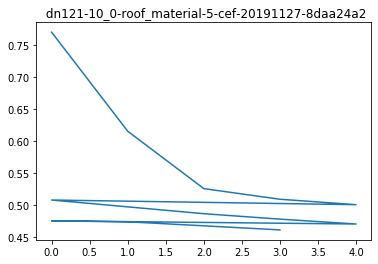

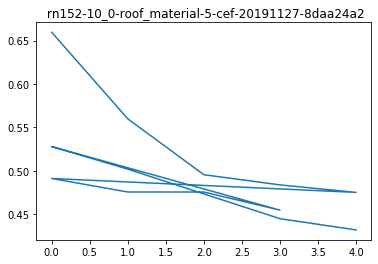

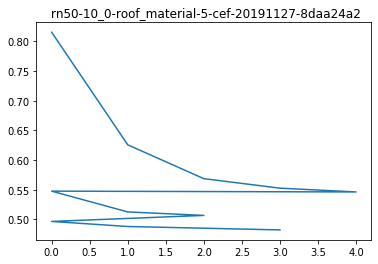

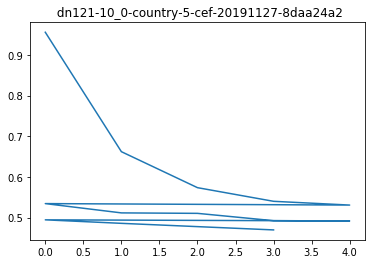

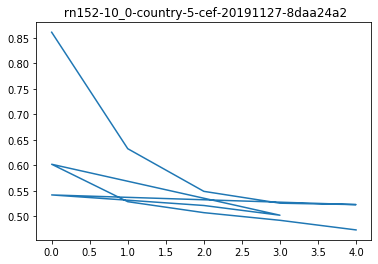

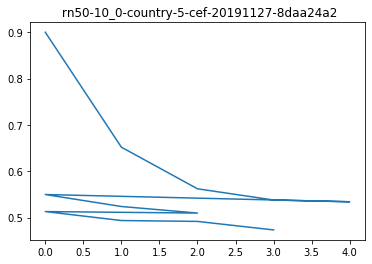

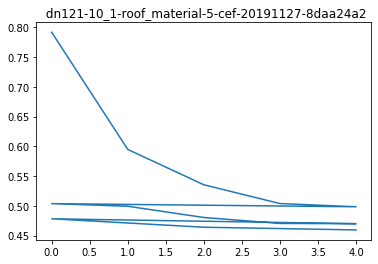

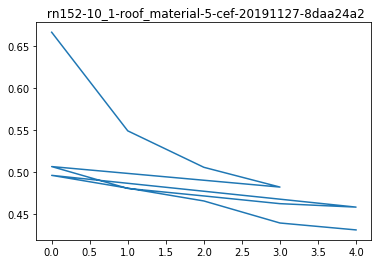

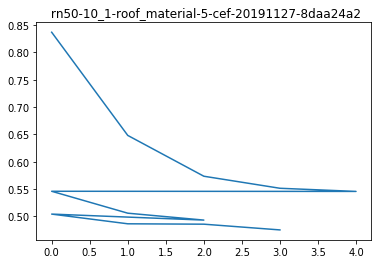

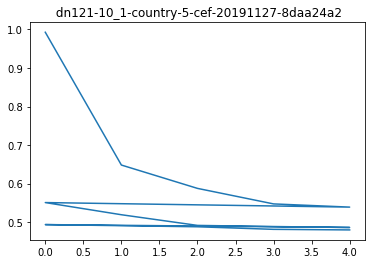

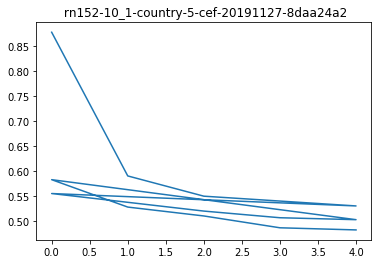

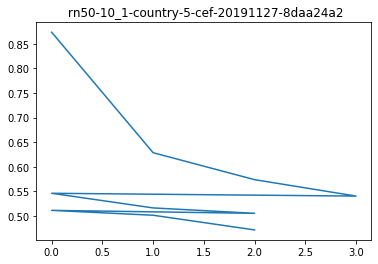

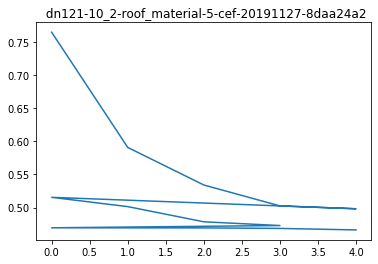

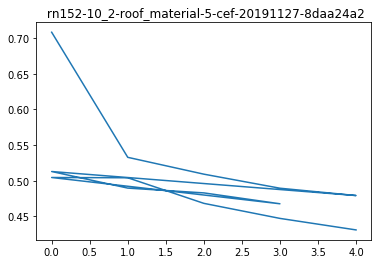

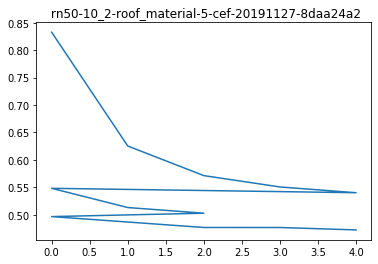

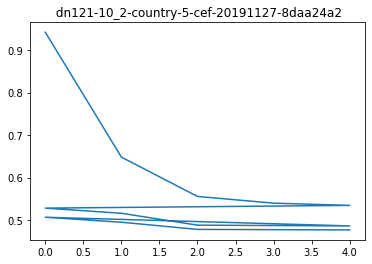

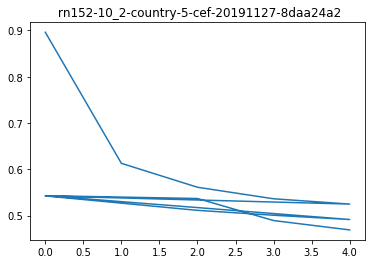

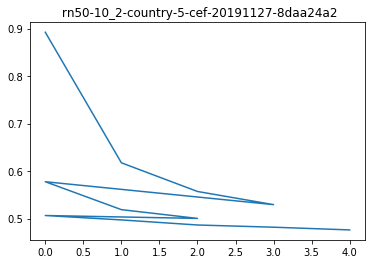

In [19]:
for key, value in useable_df.items():
    plt.figure()
    x = value['epoch']
    y1 = value['valid_loss']
    plt.plot(x,y1)
    #plt.ylim(0, 1)
    plt.title(key)

No Label Smoothing models were any good

In [20]:
en_df=pd.read_csv(data_dir/f'processing/3c19f55d_run.txt', delimiter=':', names=["epoch", "valid_loss", "model"])

In [21]:
en_df.head(n=20)

,epoch,valid_loss,model
0,0,0.934998,best-efficient_net_b4-06_16-efficientnet-2019...
1,1,0.867647,best-efficient_net_b4-06_16-efficientnet-2019...
2,4,0.848041,best-efficient_net_b4-06_16-efficientnet-2019...
3,5,0.740643,best-efficient_net_b4-06_16-efficientnet-2019...
4,6,0.703647,best-efficient_net_b4-06_16-efficientnet-2019...
5,7,0.688994,best-efficient_net_b4-06_16-efficientnet-2019...
6,8,0.631526,best-efficient_net_b4-06_16-efficientnet-2019...
7,9,0.599729,best-efficient_net_b4-06_16-efficientnet-2019...
8,10,0.581946,best-efficient_net_b4-06_16-efficientnet-2019...
9,11,0.573472,best-efficient_net_b4-06_16-efficientnet-2019...


In [22]:
en_df=en_df.drop(en_df.index[12])

In [23]:
en_df.head(n=20)

,epoch,valid_loss,model
0,0,0.934998,best-efficient_net_b4-06_16-efficientnet-2019...
1,1,0.867647,best-efficient_net_b4-06_16-efficientnet-2019...
2,4,0.848041,best-efficient_net_b4-06_16-efficientnet-2019...
3,5,0.740643,best-efficient_net_b4-06_16-efficientnet-2019...
4,6,0.703647,best-efficient_net_b4-06_16-efficientnet-2019...
5,7,0.688994,best-efficient_net_b4-06_16-efficientnet-2019...
6,8,0.631526,best-efficient_net_b4-06_16-efficientnet-2019...
7,9,0.599729,best-efficient_net_b4-06_16-efficientnet-2019...
8,10,0.581946,best-efficient_net_b4-06_16-efficientnet-2019...
9,11,0.573472,best-efficient_net_b4-06_16-efficientnet-2019...


In [24]:
useable_df['best-efficient_net_b4-06_16-efficientnet-20191128-3c19f55d'] = en_df

In [25]:
list(useable_df.keys())

[' dn121-10_0-roof_material-5-cef-20191127-8daa24a2',
 ' rn152-10_0-roof_material-5-cef-20191127-8daa24a2',
 ' rn50-10_0-roof_material-5-cef-20191127-8daa24a2',
 ' dn121-10_0-country-5-cef-20191127-8daa24a2',
 ' rn152-10_0-country-5-cef-20191127-8daa24a2',
 ' rn50-10_0-country-5-cef-20191127-8daa24a2',
 ' dn121-10_1-roof_material-5-cef-20191127-8daa24a2',
 ' rn152-10_1-roof_material-5-cef-20191127-8daa24a2',
 ' rn50-10_1-roof_material-5-cef-20191127-8daa24a2',
 ' dn121-10_1-country-5-cef-20191127-8daa24a2',
 ' rn152-10_1-country-5-cef-20191127-8daa24a2',
 ' rn50-10_1-country-5-cef-20191127-8daa24a2',
 ' dn121-10_2-roof_material-5-cef-20191127-8daa24a2',
 ' rn152-10_2-roof_material-5-cef-20191127-8daa24a2',
 ' rn50-10_2-roof_material-5-cef-20191127-8daa24a2',
 ' dn121-10_2-country-5-cef-20191127-8daa24a2',
 ' rn152-10_2-country-5-cef-20191127-8daa24a2',
 ' rn50-10_2-country-5-cef-20191127-8daa24a2',
 'best-efficient_net_b4-06_16-efficientnet-20191128-3c19f55d']

Text(0.5, 1.0, ' rn50-10_2-country-5-cef-20191127-8daa24a2')

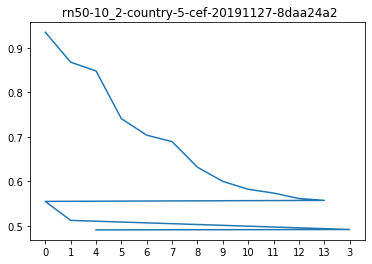

In [26]:
plt.figure()
x = en_df['epoch']
y1 = en_df['valid_loss']
plt.plot(x,y1)
#plt.ylim(0, 1)
plt.title(key)

In [27]:
def gen_df(file_):
    df = pd.read_csv(data_dir/f'processing/{file_}')
    if file_=='efficientnet_b4-06_16-efficientnet-20191128-3c19f55d.csv':
        print('efficientnet_b4')
        df['model']='efficientnet_b4'
        df['run']=0
        df['ttype']='cef'
        df['uid']='3c19f55d'
    else:
        df['model']=file_.split('-')[0]
        pfix=file_.split('10_')[1]
        run=pfix.split('-')[0]
        df['run']=run
        ttype=pfix.split(f'{run}-')[1].split('-')[0]
        df['ttype']=ttype
        df['uid']=file_
    return df

#### concat predictions

In [28]:
def concat_preds_1():
    c_list_ = []
    rm_list=[]
    region_list=[]
    data_folder = data_dir/'processing/1_without_cbs/'
    for file_ in os.listdir(data_folder):
        if file_.endswith('.csv'):
            if 'country' in file_:
                c_list_.append(gen_df(file_))
            elif 'roof_material' in file_:
                rm_list.append(gen_df(file_))
            elif 'efficientnet' in file_:
                rm_list.append(gen_df(file_))
            elif 'region' in file_:
                region_list.append(gen_df(file_))
    df_sl_c = pd.concat(c_list_)
    df_sl_rm = pd.concat(rm_list)
    df_sl_region = pd.concat(region_list)

In [29]:
useable_list=[]
for i in list(useable_df.keys()):
    fi=i.strip()
    #if 'best-efficient' in fi:
        #fi = 'efficientnet_b4-06_16-efficientnet-20191128-3c19f55d'
    useable_list.append(fi)

In [30]:
def concat_preds_2():
    rm_list=[]
    c_list=[]
    r_list=[]
    data_folder = data_dir/'processing/'
    l=useable_list
    ls=[]
    f_list=[]
    for i in l:
        ls.append(i.strip())
    for file_ in os.listdir(data_folder):
        if file_.endswith('.csv'):
            f = file_.replace("-all_unverified-", "-")
            f=f.strip()
            if f.split('.csv')[0] in ls:
                if 'roof_material' in f:
                    rm_list.append(gen_df(f))
                elif 'country' in f:
                    c_list.append(gen_df(f))
                elif 'region' in f:
                    r_list.append(gen_df(f))
                #elif 'efficientnet' in f:
                #    print('efficientnet')
                #    rm_list.append(gen_df(f))
                else:
                    print(f.split('.csv')[0])
                f_list.append(f.split('.csv')[0])
    df_roofmat = pd.concat(rm_list)
    df_cntry = pd.concat(c_list)
    df_region = pd.concat(c_list)
    return df_roofmat, df_cntry, df_region, f_list

In [31]:
#useable_list

In [32]:
#f_list

In [33]:
df_roofmat, df_cntry, df_region, f_list=concat_preds_2()

best-efficient_net_b4-06_16-efficientnet-20191128-3c19f55d


In [34]:
dif_list = list(set(useable_list) - set(f_list))

In [35]:
dif_list

[]

In [36]:
df_roofmat.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,model,run,ttype,uid
0,7a24bd7e,0.004939,0.932740,0.001336,0.004563,0.056422,rn152,1,roof_material,rn152-10_1-roof_material-5-cef-20191127-8daa24...
1,7a2cf00c,0.017172,0.947697,0.004637,0.021555,0.008939,rn152,1,roof_material,rn152-10_1-roof_material-5-cef-20191127-8daa24...
2,7a3975e8,0.006075,0.975022,0.003209,0.011226,0.004468,rn152,1,roof_material,rn152-10_1-roof_material-5-cef-20191127-8daa24...
3,7a1d215e,0.002101,0.713817,0.001633,0.014818,0.267632,rn152,1,roof_material,rn152-10_1-roof_material-5-cef-20191127-8daa24...
4,7a42475e,0.007688,0.964313,0.001483,0.007898,0.018618,rn152,1,roof_material,rn152-10_1-roof_material-5-cef-20191127-8daa24...


In [37]:
df_roofmat.uid.unique()

array(['rn152-10_1-roof_material-5-cef-20191127-8daa24a2.csv', 'dn121-10_1-roof_material-5-cef-20191127-8daa24a2.csv',
       'rn50-10_0-roof_material-5-cef-20191127-8daa24a2.csv', 'rn50-10_1-roof_material-5-cef-20191127-8daa24a2.csv',
       'rn152-10_2-roof_material-5-cef-20191127-8daa24a2.csv', 'rn50-10_2-roof_material-5-cef-20191127-8daa24a2.csv',
       'dn121-10_0-roof_material-5-cef-20191127-8daa24a2.csv', 'dn121-10_2-roof_material-5-cef-20191127-8daa24a2.csv',
       'rn152-10_0-roof_material-5-cef-20191127-8daa24a2.csv'], dtype=object)

In [38]:
df_region.head()

,id,concrete_cement_colombia,concrete_cement_guatemala,concrete_cement_st_lucia,healthy_metal_colombia,healthy_metal_guatemala,healthy_metal_st_lucia,incomplete_colombia,incomplete_st_lucia,irregular_metal_colombia,irregular_metal_guatemala,irregular_metal_st_lucia,other_colombia,other_guatemala,other_st_lucia,model,run,ttype,uid
0,7a24bd7e,0.000505,0.002495,0.006808,0.000410,0.000241,0.953270,0.000137,0.000654,0.000182,0.000280,0.003733,0.000470,0.029239,0.001576,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
1,7a2cf00c,0.010805,0.133181,0.019100,0.051424,0.263356,0.396560,0.019273,0.006037,0.039630,0.010314,0.006121,0.016071,0.026755,0.001372,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
2,7a3975e8,0.004618,0.001411,0.002768,0.065473,0.006193,0.849746,0.002883,0.002225,0.036617,0.005119,0.009132,0.003953,0.001582,0.008280,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
3,7a1d215e,0.000175,0.000265,0.000417,0.000514,0.000177,0.989979,0.000148,0.000364,0.000157,0.000224,0.004457,0.000508,0.000422,0.002192,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
4,7a42475e,0.011410,0.021139,0.008054,0.015009,0.002517,0.627861,0.000862,0.001490,0.000921,0.001612,0.004258,0.001577,0.302497,0.000793,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv


In [39]:
df_region.model.unique()

array(['rn50', 'rn152', 'dn121'], dtype=object)

In [40]:
df_cntry.head()

,id,concrete_cement_colombia,concrete_cement_guatemala,concrete_cement_st_lucia,healthy_metal_colombia,healthy_metal_guatemala,healthy_metal_st_lucia,incomplete_colombia,incomplete_st_lucia,irregular_metal_colombia,irregular_metal_guatemala,irregular_metal_st_lucia,other_colombia,other_guatemala,other_st_lucia,model,run,ttype,uid
0,7a24bd7e,0.000505,0.002495,0.006808,0.000410,0.000241,0.953270,0.000137,0.000654,0.000182,0.000280,0.003733,0.000470,0.029239,0.001576,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
1,7a2cf00c,0.010805,0.133181,0.019100,0.051424,0.263356,0.396560,0.019273,0.006037,0.039630,0.010314,0.006121,0.016071,0.026755,0.001372,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
2,7a3975e8,0.004618,0.001411,0.002768,0.065473,0.006193,0.849746,0.002883,0.002225,0.036617,0.005119,0.009132,0.003953,0.001582,0.008280,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
3,7a1d215e,0.000175,0.000265,0.000417,0.000514,0.000177,0.989979,0.000148,0.000364,0.000157,0.000224,0.004457,0.000508,0.000422,0.002192,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
4,7a42475e,0.011410,0.021139,0.008054,0.015009,0.002517,0.627861,0.000862,0.001490,0.000921,0.001612,0.004258,0.001577,0.302497,0.000793,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv


In [41]:
df_cntry.model.unique()

array(['rn50', 'rn152', 'dn121'], dtype=object)

In [42]:
def get_c_r_by_model_type(df, model):
    df = df.loc[(df['model'] == model)]
    ids=df.id.values.tolist()
    df.drop(columns=['id','model','run','ttype','uid'],inplace=True)
    classes=df.idxmax(axis=1)
    df['roof_material']=classes
    df['id']=ids
    return df

In [43]:
def print_lengths(ls):
    for l in ls:
        print(len(l))

In [44]:
def country_to_roof(df_in):
    ttype='region'
    model_dfs={}
    for model in ['rn50','rn152', 'dn121']:
        df = df_in.copy()
        cols=list(df)
        hm=[]
        im=[]
        cc=[]
        ot=[]
        inc=[]
        healthy_metals = [s for s in cols if 'healthy_metal' in s]
        irregular_metals = [s for s in cols if 'irregular_metal' in s]
        concrete_cements = [s for s in cols if 'concrete_cement' in s]
        others = [s for s in cols if 'other' in s]
        incompletes = [s for s in cols if 'incomplete' in s]

        df["healthy_metal"] = df[healthy_metals].max(axis=1)
        df["irregular_metal"] = df[irregular_metals].max(axis=1)
        df["concrete_cement"] = df[concrete_cements].max(axis=1)
        df["other"] = df[others].max(axis=1)
        df["incomplete"] = df[incompletes].max(axis=1)

        # #### drop region/country
        df.drop(columns=healthy_metals, inplace=True)
        df.drop(columns=irregular_metals, inplace=True)
        df.drop(columns=concrete_cements, inplace=True)
        df.drop(columns=others, inplace=True)
        df.drop(columns=incompletes, inplace=True)
        df = get_c_r_by_model_type(df, model)
        model_dfs[model]=df
    return model_dfs

In [45]:
df_region.head()

,id,concrete_cement_colombia,concrete_cement_guatemala,concrete_cement_st_lucia,healthy_metal_colombia,healthy_metal_guatemala,healthy_metal_st_lucia,incomplete_colombia,incomplete_st_lucia,irregular_metal_colombia,irregular_metal_guatemala,irregular_metal_st_lucia,other_colombia,other_guatemala,other_st_lucia,model,run,ttype,uid
0,7a24bd7e,0.000505,0.002495,0.006808,0.000410,0.000241,0.953270,0.000137,0.000654,0.000182,0.000280,0.003733,0.000470,0.029239,0.001576,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
1,7a2cf00c,0.010805,0.133181,0.019100,0.051424,0.263356,0.396560,0.019273,0.006037,0.039630,0.010314,0.006121,0.016071,0.026755,0.001372,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
2,7a3975e8,0.004618,0.001411,0.002768,0.065473,0.006193,0.849746,0.002883,0.002225,0.036617,0.005119,0.009132,0.003953,0.001582,0.008280,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
3,7a1d215e,0.000175,0.000265,0.000417,0.000514,0.000177,0.989979,0.000148,0.000364,0.000157,0.000224,0.004457,0.000508,0.000422,0.002192,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv
4,7a42475e,0.011410,0.021139,0.008054,0.015009,0.002517,0.627861,0.000862,0.001490,0.000921,0.001612,0.004258,0.001577,0.302497,0.000793,rn50,2,country,rn50-10_2-country-5-cef-20191127-8daa24a2.csv


In [46]:
model_dfs=country_to_roof(df_region)

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [47]:
df_region_rn50=model_dfs['rn50']
df_region_rn152=model_dfs['rn152']
df_region_dn121=model_dfs['dn121']

In [48]:
df_region_rn50.head()

,healthy_metal,irregular_metal,concrete_cement,other,incomplete,roof_material,id
0,0.953270,0.003733,0.006808,0.029239,0.000654,healthy_metal,7a24bd7e
1,0.396560,0.039630,0.133181,0.026755,0.019273,healthy_metal,7a2cf00c
2,0.849746,0.036617,0.004618,0.008280,0.002883,healthy_metal,7a3975e8
3,0.989979,0.004457,0.000417,0.002192,0.000364,healthy_metal,7a1d215e
4,0.627861,0.004258,0.021139,0.302497,0.001490,healthy_metal,7a42475e


In [49]:
def plot_df_types(df1, df2, df3):
    ax = df1.roof_material.value_counts().plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.2)
    ax1 = df2.roof_material.value_counts().plot(kind='bar', color='green', width=.5, legend=True, alpha=0.2)
    df3.roof_material.value_counts().plot(kind='bar', color='maroon', width=.25, alpha=0.5, legend=True)

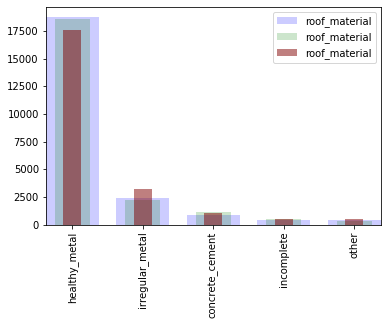

In [50]:
plot_df_types(df_region_rn50, df_region_rn152, df_region_dn121 )

In [51]:
def get_splits(df_in, roof_type, model):
    df_hm=df_in[['id', roof_type]]
    result = df_hm.groupby(['id'], as_index=False).agg(
                     ['mean', 'std'])
    result.sort_values(by=(roof_type,'std'),ascending=False).head()
    result.columns = result.columns.droplevel(0)
    result=result.sort_values(by=('std'),ascending=False).reset_index()
    result.plot.hist(bins=100, alpha=0.3, title=model)
    return result

In [52]:
def concate_df_results(df_rn50, df_rn152, df_dn121):
    '''get ids where they are in all the df's then do mean of probailities for single pred'''
    rn50ids=df_rn50.id.values.tolist()
    rn152ids=df_rn152.id.values.tolist()
    dn121ids=df_dn121.id.values.tolist()
    all_iter= set(rn50ids) & set(rn152ids) & set(dn121ids)
    df1=df_rn50.loc[df_rn50['id'].isin(all_iter)]
    df2=df_rn152.loc[df_rn152['id'].isin(all_iter)]
    df3=df_dn121.loc[df_dn121['id'].isin(all_iter)]
    frames = [df1, df2, df3]
    df= pd.concat(frames)
    result = df.groupby('id', as_index=False).mean()
    return result
    

In [53]:
#### Healthy metal

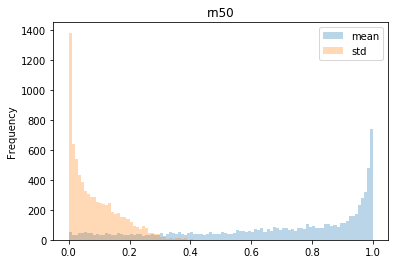

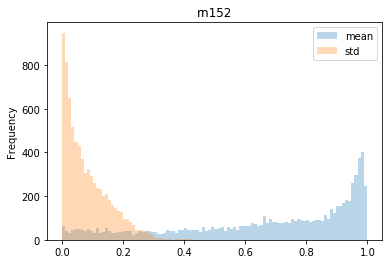

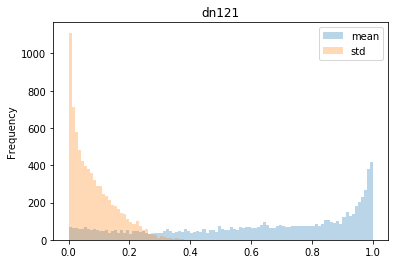

In [54]:
result_rn50=get_splits(df_region_rn50, 'healthy_metal', 'rn50')
result_rn152=get_splits(df_region_rn152, 'healthy_metal', 'rn152')
result_dn121=get_splits(df_region_dn121, 'healthy_metal', 'dn121')

Try as first pass using 0.8 mean as cutoff

In [55]:
hm_rn50_80pct_plus=result_rn50.loc[result_rn50['mean'] >= 0.8]
hm_rn50_70pct_plus=result_rn50.loc[result_rn50['mean'] >= 0.7]

In [56]:
hm_rn152_80pct_plus=result_rn152.loc[result_rn152['mean'] >= 0.8]
hm_rn152_70pct_plus=result_rn152.loc[result_rn152['mean'] >= 0.7]

In [57]:
hm_dn121_80pct_plus=result_dn121.loc[result_dn121['mean'] >= 0.8]
hm_dn121_70pct_plus=result_dn121.loc[result_dn121['mean'] >= 0.7]

In [58]:
len(hm_rn50_80pct_plus)/len(result_rn50)

0.4873584408743745

In [59]:
hm_80pct=concate_df_results(hm_rn50_80pct_plus, hm_rn152_80pct_plus, hm_dn121_80pct_plus)
hm_70pct=concate_df_results(hm_rn50_70pct_plus, hm_rn152_70pct_plus, hm_dn121_70pct_plus)

In [60]:
len(hm_80pct)/len(hm_rn50_80pct_plus)

0.6687381788705755

In [61]:
len(hm_80pct)

2475

In [62]:
hm_80pct.head()

,id,mean,std
0,7a1c5b2a,0.989738,0.006410
1,7a1c5c6a,0.951573,0.010842
2,7a1c5d14,0.936311,0.035347
3,7a1c6458,0.993839,0.002727
4,7a1c6836,0.990383,0.006711


In [63]:
hm_80pct['roof_type']= 'healthy_metal'
hm_70pct['roof_type']= 'healthy_metal'
hm_80pct.drop(columns=['mean','std'],inplace=True)
hm_70pct.drop(columns=['mean','std'],inplace=True)

concrete_cement 	healthy_metal 	incomplete 	irregular_metal 	other

#### Irregular metal

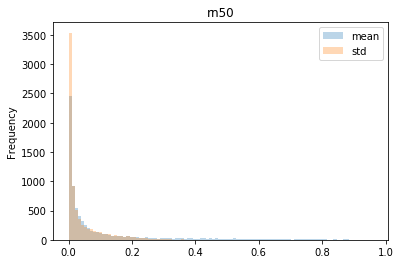

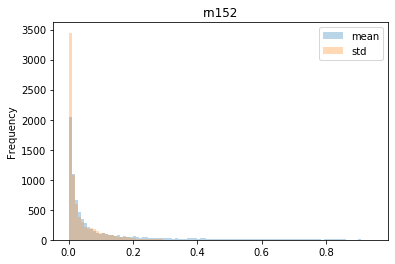

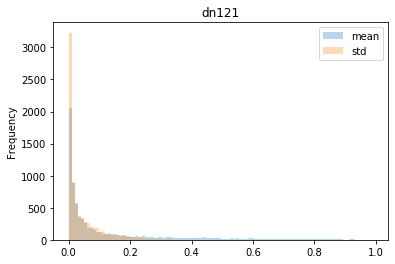

In [64]:
ir_rn50=get_splits(df_region_rn50, 'irregular_metal', 'rn50')
ir_rn152=get_splits(df_region_rn152, 'irregular_metal', 'rn152')
ir_dn121=get_splits(df_region_dn121, 'irregular_metal', 'dn121')

In [65]:
df_region_rn50.head()

,healthy_metal,irregular_metal,concrete_cement,other,incomplete,roof_material,id
0,0.953270,0.003733,0.006808,0.029239,0.000654,healthy_metal,7a24bd7e
1,0.396560,0.039630,0.133181,0.026755,0.019273,healthy_metal,7a2cf00c
2,0.849746,0.036617,0.004618,0.008280,0.002883,healthy_metal,7a3975e8
3,0.989979,0.004457,0.000417,0.002192,0.000364,healthy_metal,7a1d215e
4,0.627861,0.004258,0.021139,0.302497,0.001490,healthy_metal,7a42475e


In [66]:
ir_rn50_80pct_plus=ir_rn50.loc[ir_rn50['mean'] >= 0.8]
ir_rn50_70pct_plus=ir_rn50.loc[ir_rn50['mean'] >= 0.7]

In [67]:
len(ir_rn50_80pct_plus)

72

In [68]:
ir_rn50_80pct_plus.head()

,id,mean,std
637,7a370b00,0.804342,0.146290
681,7a299d8a,0.857987,0.139567
730,7a23040c,0.832147,0.132976
869,7a39861e,0.808203,0.120009
1022,7a28b4ba,0.844831,0.105072


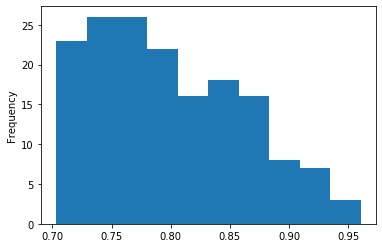

In [69]:
ir_rn50_70pct_plus['mean'].plot.hist()

In [70]:
ir_rn152_80pct_plus=ir_rn152.loc[ir_rn152['mean'] >= 0.8]
ir_rn152_70pct_plus=ir_rn152.loc[ir_rn152['mean'] >= 0.7]

In [71]:
ir_dn121_80pct_plus=ir_dn121.loc[ir_dn121['mean'] >= 0.8]
ir_dn121_70pct_plus=ir_dn121.loc[ir_dn121['mean'] >= 0.7]

In [72]:
ir_80pct=concate_df_results(ir_rn50_80pct_plus, ir_rn152_80pct_plus, ir_dn121_80pct_plus)
ir_70pct=concate_df_results(ir_rn50_70pct_plus, ir_rn152_70pct_plus, ir_dn121_70pct_plus)

In [73]:
len(ir_rn50_80pct_plus)

72

In [74]:
ir_rn50_80pct_plus.head()

,id,mean,std
637,7a370b00,0.804342,0.146290
681,7a299d8a,0.857987,0.139567
730,7a23040c,0.832147,0.132976
869,7a39861e,0.808203,0.120009
1022,7a28b4ba,0.844831,0.105072


In [75]:
ir_80pct.head()

,id,mean,std
0,7a1e8080,0.851592,0.048519
1,7a1e8be8,0.851511,0.075570
2,7a1ed7ec,0.941658,0.020244
3,7a1f7076,0.891272,0.036736
4,7a234a66,0.900211,0.030302


In [76]:
ir_80pct['roof_type']= 'irregular_metal'
ir_70pct['roof_type']= 'irregular_metal'
ir_80pct.drop(columns=['mean','std'],inplace=True)
ir_70pct.drop(columns=['mean','std'],inplace=True)

#### concrete cement

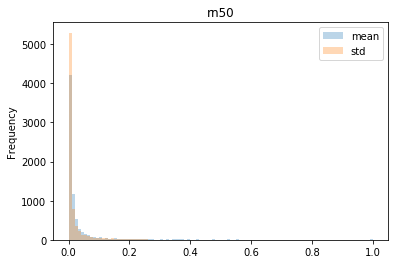

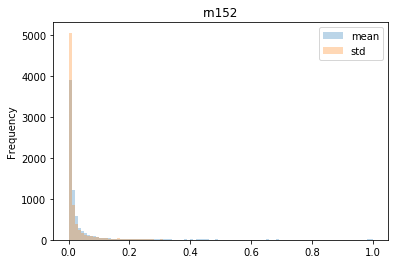

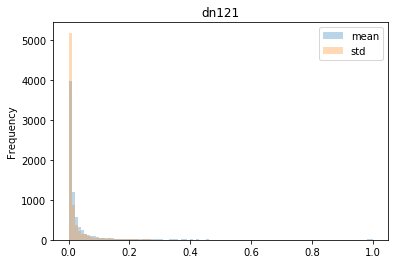

In [77]:
cc_rn50=get_splits(df_region_rn50, 'concrete_cement', 'rn50')
cc_rn152=get_splits(df_region_rn152, 'concrete_cement', 'rn152')
cc_dn121=get_splits(df_region_dn121, 'concrete_cement', 'dn121')

In [78]:
cc_rn50_80pct_plus=cc_rn50.loc[cc_rn50['mean'] >= 0.8]
cc_rn50_70pct_plus=cc_rn50.loc[cc_rn50['mean'] >= 0.7]

In [79]:
cc_rn152_80pct_plus=cc_rn152.loc[cc_rn152['mean'] >= 0.8]
cc_rn152_70pct_plus=cc_rn152.loc[cc_rn152['mean'] >= 0.7]

In [80]:
cc_dn121_80pct_plus=cc_dn121.loc[cc_dn121['mean'] >= 0.8]
cc_dn121_70pct_plus=cc_dn121.loc[cc_dn121['mean'] >= 0.7]

In [81]:
cc_80pct=concate_df_results(cc_rn50_80pct_plus, cc_rn152_80pct_plus, cc_dn121_80pct_plus)
cc_70pct=concate_df_results(cc_rn50_70pct_plus, cc_rn152_70pct_plus, cc_dn121_70pct_plus)

In [82]:
len(cc_70pct)

59

In [83]:
cc_70pct.head()

,id,mean,std
0,7a1ce338,0.999163,0.000768
1,7a1ec31a,0.913840,0.075832
2,7a2033c6,0.986869,0.004955
3,7a2129c0,0.991680,0.010562
4,7a216a52,0.894474,0.118695


In [84]:
cc_80pct['roof_type']= 'concrete_cement'
cc_70pct['roof_type']= 'concrete_cement'
cc_80pct.drop(columns=['mean','std'],inplace=True)
cc_70pct.drop(columns=['mean','std'],inplace=True)

#### incomplete

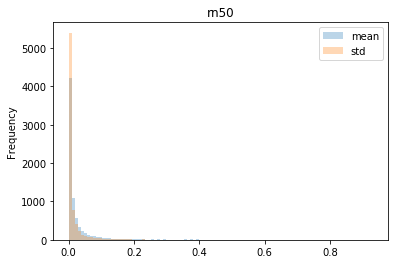

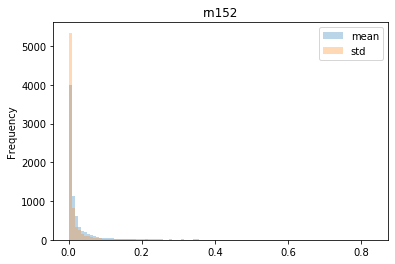

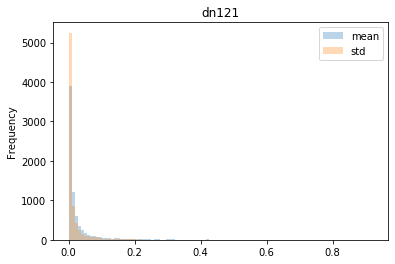

In [85]:
ic_rn50=get_splits(df_region_rn50, 'incomplete', 'rn50')
ic_rn152=get_splits(df_region_rn152, 'incomplete', 'rn152')
ic_dn121=get_splits(df_region_dn121, 'incomplete', 'dn121')

In [86]:
ic_rn50_80pct_plus=ic_rn50.loc[ic_rn50['mean'] >= 0.8]
ic_rn50_70pct_plus=ic_rn50.loc[ic_rn50['mean'] >= 0.7]

In [87]:
ic_rn152_80pct_plus=ic_rn152.loc[ic_rn152['mean'] >= 0.8]
ic_rn152_70pct_plus=ic_rn152.loc[ic_rn152['mean'] >= 0.7]

In [88]:
ic_dn121_80pct_plus=ic_dn121.loc[ic_dn121['mean'] >= 0.8]
ic_dn121_70pct_plus=ic_dn121.loc[ic_dn121['mean'] >= 0.7]

In [89]:
ic_80pct=concate_df_results(ic_rn50_80pct_plus, ic_rn152_80pct_plus, ic_dn121_80pct_plus)
ic_70pct=concate_df_results(ic_rn50_70pct_plus, ic_rn152_70pct_plus, ic_dn121_70pct_plus)

In [90]:
len(ic_70pct)

5

In [91]:
ic_70pct.head()

,id,mean,std
0,7a32403e,0.824357,0.102494
1,7a32f538,0.825143,0.079229
2,7a33ff6e,0.802123,0.112165
3,7a3cbeba,0.846415,0.067191
4,7a3db8ba,0.791882,0.091488


In [92]:
ic_80pct['roof_type']= 'incomplete'
ic_70pct['roof_type']= 'incomplete'
ic_80pct.drop(columns=['mean','std'],inplace=True)
ic_70pct.drop(columns=['mean','std'],inplace=True)

#### other

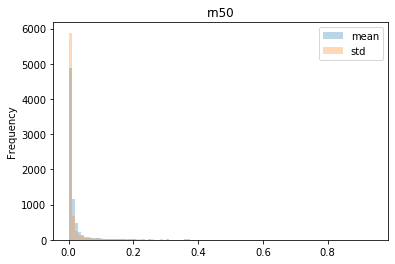

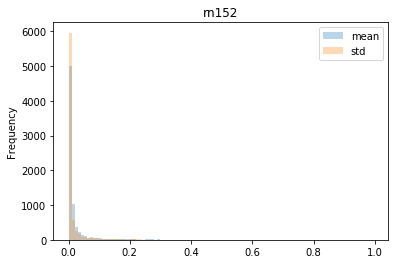

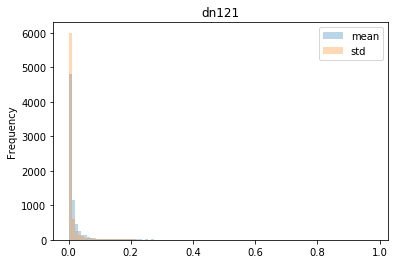

In [93]:
ot_rn50=get_splits(df_region_rn50, 'other', 'rn50')
ot_rn152=get_splits(df_region_rn152, 'other', 'rn152')
ot_dn121=get_splits(df_region_dn121, 'other', 'dn121')

In [94]:
ot_rn50_80pct_plus=ot_rn50.loc[ot_rn50['mean'] >= 0.8]
ot_rn50_70pct_plus=ot_rn50.loc[ot_rn50['mean'] >= 0.7]

In [95]:
ot_rn152_80pct_plus=ot_rn152.loc[ot_rn152['mean'] >= 0.8]
ot_rn152_70pct_plus=ot_rn152.loc[ot_rn152['mean'] >= 0.7]

In [96]:
ot_dn121_80pct_plus=ot_dn121.loc[ot_dn121['mean'] >= 0.8]
ot_dn121_70pct_plus=ot_dn121.loc[ot_dn121['mean'] >= 0.7]

In [97]:
ot_80pct=concate_df_results(ot_rn50_80pct_plus, ot_rn152_80pct_plus, ot_dn121_80pct_plus)
ot_70pct=concate_df_results(ot_rn50_70pct_plus, ot_rn152_70pct_plus, ot_dn121_70pct_plus)

In [98]:
len(ot_70pct)

20

In [99]:
ot_80pct.head()

,id,mean,std
0,7a1d7dca,0.883503,0.044116
1,7a1eb0b4,0.967453,0.032860
2,7a1fffe6,0.940731,0.024905
3,7a214c84,0.873530,0.052674
4,7a2768c6,0.938175,0.037131


In [100]:
ot_80pct['roof_type']= 'other'
ot_70pct['roof_type']= 'other'
ot_80pct.drop(columns=['mean','std'],inplace=True)
ot_70pct.drop(columns=['mean','std'],inplace=True)

### Add all together

In [101]:
frames_80pct = [hm_80pct, ir_80pct, cc_80pct,ic_80pct,ot_80pct]
df_80pct= pd.concat(frames_80pct)
frames_70pct = [hm_70pct, ir_70pct, cc_70pct,ic_70pct,ot_70pct]
df_70pct= pd.concat(frames_70pct)

In [102]:
df_80pct.head()

,id,roof_type
0,7a1c5b2a,healthy_metal
1,7a1c5c6a,healthy_metal
2,7a1c5d14,healthy_metal
3,7a1c6458,healthy_metal
4,7a1c6836,healthy_metal


In [103]:
len(df_80pct)

2556

these should not be > dataset length, dont use for now

In [104]:
len(df_70pct)

3369

In [105]:
df_all=pd.read_csv(data_dir/'df_train_all.csv')

In [106]:
df_counrty_80pct=df_all.loc[df_all['id'].isin(df_80pct.id.values.tolist())]

In [107]:
df_counrty_80pct.country.unique()

array(['st_lucia'], dtype=object)

In [108]:
df_counrty_80pct.region.unique()

array(['castries', 'gros_islet'], dtype=object)

In [109]:
df_all.head()

,id,roof_material,verified,country,region
0,7a3f2a10,concrete_cement,True,colombia,borde_rural
1,7a1f731e,irregular_metal,True,colombia,borde_rural
2,7a424ad8,healthy_metal,True,colombia,borde_rural
3,7a3edc5e,healthy_metal,True,colombia,borde_rural
4,7a303a6e,healthy_metal,True,colombia,borde_rural


In [110]:
df_80pct.head()

,id,roof_type
0,7a1c5b2a,healthy_metal
1,7a1c5c6a,healthy_metal
2,7a1c5d14,healthy_metal
3,7a1c6458,healthy_metal
4,7a1c6836,healthy_metal


In [111]:
df_all_vals=df_all.loc[df_all['id'].isin(df_80pct.id.values.tolist())]

In [112]:
df_all_vals.head()

,id,roof_material,verified,country,region
13868,7a3975e8,healthy_metal,False,st_lucia,castries
13869,7a1d215e,healthy_metal,False,st_lucia,castries
13871,7a40f1d8,healthy_metal,False,st_lucia,castries
13874,7a352524,healthy_metal,False,st_lucia,castries
13876,7a3ce822,healthy_metal,False,st_lucia,castries


In [113]:
ids_sort_by=df_80pct.id.values.tolist()

In [114]:
ids_sort_by[1:5]

['7a1c5c6a', '7a1c5d14', '7a1c6458', '7a1c6836']

In [115]:
df_all_vals['id_cat'] = pd.Categorical(
 df_all_vals['id'], 
 categories=ids_sort_by, 
 ordered=True
)
df_all_vals=df_all_vals.sort_values('id_cat')

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [116]:
df_all_vals.head()

,id,roof_material,verified,country,region,id_cat
21042,7a1c5b2a,healthy_metal,False,st_lucia,gros_islet,7a1c5b2a
18783,7a1c5c6a,healthy_metal,False,st_lucia,castries,7a1c5c6a
16496,7a1c5d14,healthy_metal,False,st_lucia,castries,7a1c5d14
17544,7a1c6458,healthy_metal,False,st_lucia,castries,7a1c6458
16726,7a1c6836,healthy_metal,False,st_lucia,castries,7a1c6836


In [117]:
df_all_vals.drop(columns=['id_cat'],inplace=True)

make sure ids smae before we push columns accross

In [118]:
df_all_vals.id.values.tolist() == df_80pct.id.values.tolist()

True

In [119]:
df_80pct['verified']=True
df_80pct['country']='st_lucia'
df_80pct['region']=df_all_vals['region'].values.tolist()

In [120]:
df_80pct.head()

,id,roof_type,verified,country,region
0,7a1c5b2a,healthy_metal,True,st_lucia,gros_islet
1,7a1c5c6a,healthy_metal,True,st_lucia,castries
2,7a1c5d14,healthy_metal,True,st_lucia,castries
3,7a1c6458,healthy_metal,True,st_lucia,castries
4,7a1c6836,healthy_metal,True,st_lucia,castries


#### 70 pct

In [121]:
df_all=pd.read_csv(data_dir/'df_train_all.csv')

In [122]:
df_all_vals_70=df_all.loc[df_all['id'].isin(df_70pct.id.values.tolist())]

In [123]:
ids_sort_by_70=df_70pct.id.values.tolist()

In [124]:
df_all_vals_70['id_cat'] = pd.Categorical(
 df_all_vals_70['id'], 
 categories=ids_sort_by_70, 
 ordered=True
)
df_all_vals_70=df_all_vals_70.sort_values('id_cat')

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
df_all_vals_70.drop(columns=['id_cat'],inplace=True)

In [126]:
df_all_vals_70.id.values.tolist() == df_70pct.id.values.tolist()

True

In [127]:
df_70pct['verified']=True
df_70pct['country']='st_lucia'
df_70pct['region']=df_all_vals_70['region'].values.tolist()

In [128]:
df_70pct.rename(columns={'roof_type': 'roof_material'}, inplace=True)
df_80pct.rename(columns={'roof_type': 'roof_material'}, inplace=True)

In [129]:
df_80pct.to_csv(data_dir/'st_lucia_castries_gros_islet_80pct_rn50-rn152-dn121_preds.csv', index=False)
df_70pct.to_csv(data_dir/'st_lucia_castries_gros_islet_70pct_rn50-rn152-dn121_preds.csv', index=False)

In [130]:
useable_list

['dn121-10_0-roof_material-5-cef-20191127-8daa24a2',
 'rn152-10_0-roof_material-5-cef-20191127-8daa24a2',
 'rn50-10_0-roof_material-5-cef-20191127-8daa24a2',
 'dn121-10_0-country-5-cef-20191127-8daa24a2',
 'rn152-10_0-country-5-cef-20191127-8daa24a2',
 'rn50-10_0-country-5-cef-20191127-8daa24a2',
 'dn121-10_1-roof_material-5-cef-20191127-8daa24a2',
 'rn152-10_1-roof_material-5-cef-20191127-8daa24a2',
 'rn50-10_1-roof_material-5-cef-20191127-8daa24a2',
 'dn121-10_1-country-5-cef-20191127-8daa24a2',
 'rn152-10_1-country-5-cef-20191127-8daa24a2',
 'rn50-10_1-country-5-cef-20191127-8daa24a2',
 'dn121-10_2-roof_material-5-cef-20191127-8daa24a2',
 'rn152-10_2-roof_material-5-cef-20191127-8daa24a2',
 'rn50-10_2-roof_material-5-cef-20191127-8daa24a2',
 'dn121-10_2-country-5-cef-20191127-8daa24a2',
 'rn152-10_2-country-5-cef-20191127-8daa24a2',
 'rn50-10_2-country-5-cef-20191127-8daa24a2',
 'best-efficient_net_b4-06_16-efficientnet-20191128-3c19f55d']

The saved predictions are predictions from an 18 model ensemble (efficientnet not used) where all models are predicting the same roof type witch certain thresholds